## 1. 라이브러리 불러오기
머신러닝 학습을 위한 numpy, matplotlib, sklearn을 불러옵니다.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 815 ('font.family : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 816 ('font.sans-serif : Noto Sans KR')
Duplicate key in file WindowsPath('C:/Users/jinhyeongsik/anaconda3/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 817 ('axes.unicode_minus : False')


## 2. 시각화 스타일 지정
matplotlib 스타일을 seaborn notebook 테마로 설정

In [2]:
plt.style.available
plt.style.use('seaborn-v0_8-notebook')

np.random.rand(100, 1) : 0과 1사이의 난수를 (100, 1) 크기로 생성  
noise : 잡음, 오차  
plt.scatter(X, y) : X와 y 데이터를 산점도로 시각화  

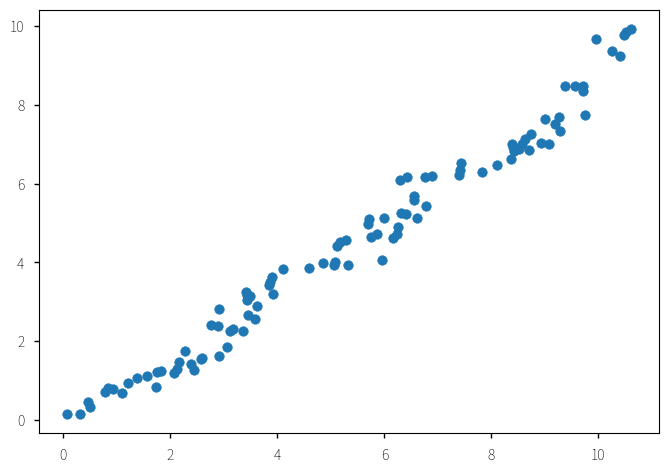

In [3]:
noise = np.random.rand(100, 1)

X = sorted(10 * np.random.rand(100, 1)) + noise
y = sorted(10 * np.random.rand(100))

plt.scatter(X, y);

산점도 형태가 퍼져 있으나 대체로 증가하는 형태이다.

## 3. 선형 회귀 모델 학습

- `train_test_split`: 데이터를 훈련/테스트로 나눔 (80:20)
- `LinearRegression()`: 선형 회귀 모델 생성
- `fit()`: 훈련 데이터로 모델 학습

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## 4. 선형 회귀 결과 출력

- `model.coef_`: 학습된 가중치 (기울기)
- `model.intercept_`: 학습된 편향 (절편)

In [5]:
print("선형 회귀 가중치: {}".format(model.coef_))
print("선형 회귀 편향: {}".format(model.intercept_))

선형 회귀 가중치: [0.89213072]
선형 회귀 편향: -0.3494314025112919


## 5. 모델 성능 평가

- `model.score(X_train, y_train)` : 학습 데이터에 대한 결정 계수(R²)  
- `model.score(X_test, y_test)` : 테스트 데이터에 대한 결정 계수(R²)

In [6]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9755735871403817
평가 데이터 점수: 0.9812670470000013


## 6. 예측 및 시각화

- `model.predict(X_test)`  
  → 테스트 데이터를 이용한 예측 결과 생성

- `plt.scatter(X_test, y_test)`  
  → 실제 데이터 분포 시각화 (파란 점)

- `plt.plot(X_test, predict, color='red')`  
  → 예측 선(Regression Line) 시각화

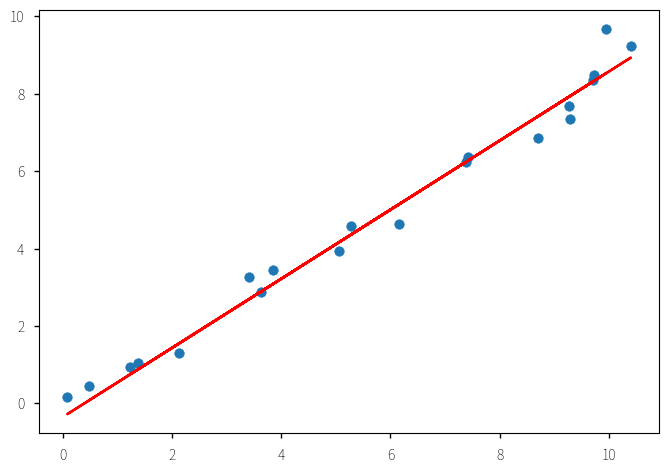

In [7]:
predict = model.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, predict, color='red')
plt.show()

산점도 위에 예측 선을 그려본 결과 대체적으로 잘 들어맞는걸 시각적으로 확인할 수 있다.

## 7. 간단한 회귀용 데이터셋

- `make_regression`  
→ (scikit-learn에서 제공하는 함수)

In [8]:
from sklearn.datasets import make_regression

In [9]:
X, y = make_regression(
                       n_samples=100,       # 샘플 수
                       n_features=1,        # 특성 수 (X의 열 수
                       noise=10.0,          # 데이터에 추가되는 노이즈의 표준편차
                       random_state=42     # 결과 재현을 위한 시드값
                      )

 - 데이터 나누기 (훈련/테스트)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- 모델 불러오기 + 학습

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

- 결과

In [12]:
print("가중치(기울기):", model.coef_)
print("편향(절편):", model.intercept_)

가중치(기울기): [44.24418216]
편향(절편): 0.09922221422587896


- 예측 및 시각화

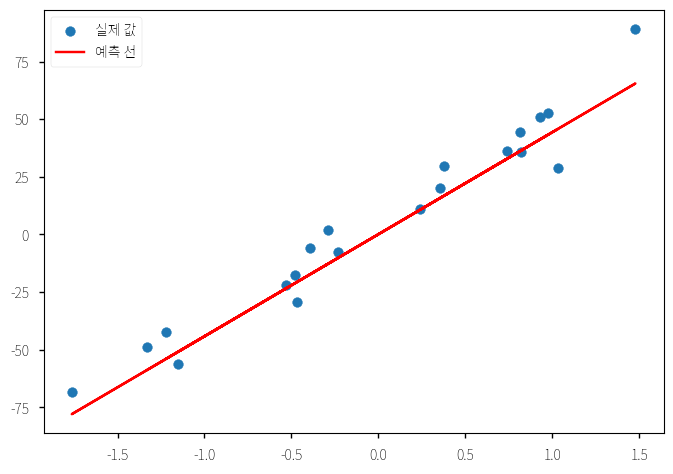

In [13]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, label='실제 값')
plt.plot(X_test, y_pred, color='red', label='예측 선')
plt.legend()
plt.show()

- MSE 계산

In [14]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 104.20222653187025


## 8. 예측 결과 시각화 단계

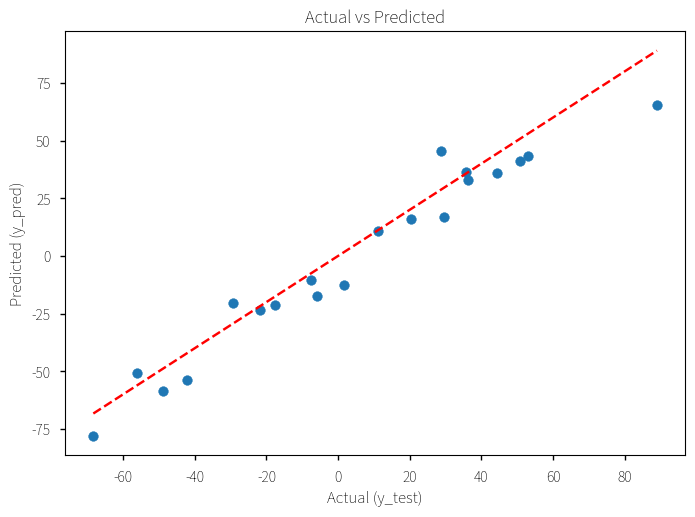

In [15]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')   #완벽 예측선
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted (y_pred)")
plt.title("Actual vs Predicted")
plt.show()

파란 점들이 빨간 예측선에 가까울수록 정확한 예측

## 9. 하이퍼 파라미터 변경
#### 1. fit_intercept=True

In [16]:
model_default = LinearRegression(fit_intercept=True)
model_default.fit(X_train, y_train)
y_pred_default = model_default.predict(X_test)

mse_default = mean_squared_error(y_test, y_pred_default)
print("기본 모델 MSE:", round(mse_default, 2))

기본 모델 MSE: 104.2


#### 2. fit_intercept=False

In [17]:
model_False = LinearRegression(fit_intercept=False)
model_False.fit(X_train, y_train)
y_pred_False = model_False.predict(X_test)

mse_False = mean_squared_error(y_test, y_pred_False)
print("기본 모델 MSE:", round(mse_False, 2))

기본 모델 MSE: 105.26


#### 3. StandardScaler

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(), LinearRegression())
model_scaled.fit(X_train, y_train)
y_pred_scaled = model_scaled.predict(X_test)

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
print("StandardScaler 적용 시 MSE:", round(mse_scaled, 2))

StandardScaler 적용 시 MSE: 104.2


In [19]:
print(f"기본 모델 MSE: {round(mse_default, 2)}")
print(f"fit_intercept=False MSE: {round(mse_False, 2)}")
print(f"스케일링 적용 MSE: {round(mse_scaled, 2)}")

기본 모델 MSE: 104.2
fit_intercept=False MSE: 105.26
스케일링 적용 MSE: 104.2
